## Markov Chain Modeling of Bomber Squadron Missions

In [2]:
import numpy as np
import pandas as pd
from itertools import product
from scipy.special import comb

# Parameters
p_D = 0.2  # Probability of being shot down during the day
p_N = 0.3  # Probability of being shot down at night
q_D = 1 - p_D
q_N = 1 - p_N

# State definitions
states = [(i, phase) for phase in ['D', 'N'] for i in range(4)]
state_index = {state: idx for idx, state in enumerate(states)}

# Initialize transition matrix
P_Z = np.zeros((8, 8))

# Fill Day (D) to Night (N) transitions
for i in range(4):
    from_state = (i, 'D')
    from_idx = state_index[from_state]
    if i == 0:
        to_state = (0, 'N')
        to_idx = state_index[to_state]
        P_Z[from_idx, to_idx] = 1.0
    else:
        for j in range(i + 1):
            prob = comb(i, j) * (q_D ** j) * (p_D ** (i - j))
            to_state = (j, 'N')
            to_idx = state_index[to_state]
            P_Z[from_idx, to_idx] = prob

# Fill Night (N) to Day (D) transitions
for j in range(4):
    from_state = (j, 'N')
    from_idx = state_index[from_state]
    if j == 3:
        to_state = (3, 'D')
        to_idx = state_index[to_state]
        P_Z[from_idx, to_idx] = 1.0
    else:
        r = 3 - j
        for k in range(r + 1):
            prob = comb(r, k) * (q_N ** k) * (p_N ** (r - k))
            to_state = (j + k, 'D')
            to_idx = state_index[to_state]
            P_Z[from_idx, to_idx] = prob

# Create DataFrame for better visualization
state_labels = [f"({b},{p})" for (b, p) in states]
df = pd.DataFrame(P_Z, index=state_labels, columns=state_labels)

# Show result
print("Transition Matrix P_Z:")
print(df.round(3))  # Rounded for cleaner display


Transition Matrix P_Z:
       (0,D)  (1,D)  (2,D)  (3,D)  (0,N)  (1,N)  (2,N)  (3,N)
(0,D)  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000
(1,D)  0.000  0.000  0.000  0.000  0.200  0.800  0.000  0.000
(2,D)  0.000  0.000  0.000  0.000  0.040  0.320  0.640  0.000
(3,D)  0.000  0.000  0.000  0.000  0.008  0.096  0.384  0.512
(0,N)  0.027  0.189  0.441  0.343  0.000  0.000  0.000  0.000
(1,N)  0.000  0.090  0.420  0.490  0.000  0.000  0.000  0.000
(2,N)  0.000  0.000  0.300  0.700  0.000  0.000  0.000  0.000
(3,N)  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000


## Graph Visualization

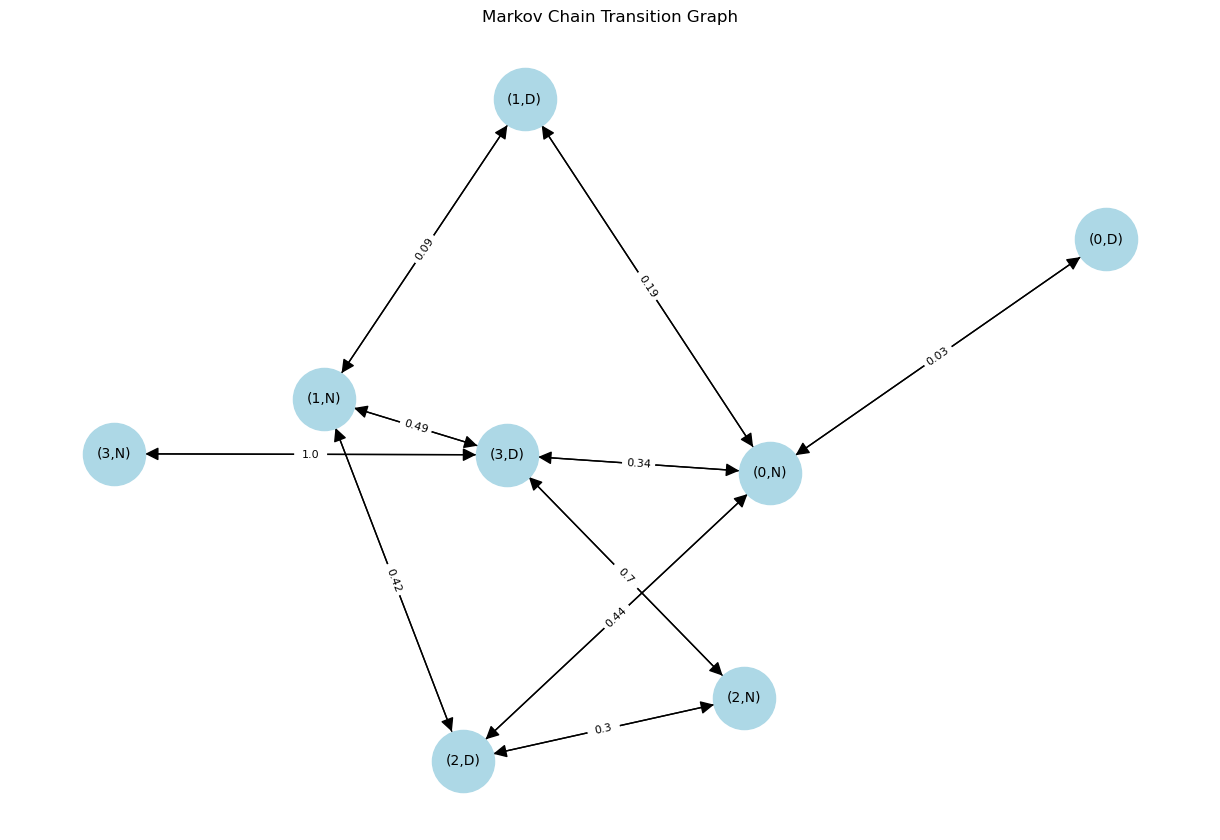

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(state_labels)

# Add edges with weights (only for non-zero transitions)
for i, from_state in enumerate(state_labels):
    for j, to_state in enumerate(state_labels):
        prob = P_Z[i, j]
        if prob > 0:
            G.add_edge(from_state, to_state, weight=round(prob, 2))

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position layout

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Markov Chain Transition Graph")
plt.axis('off')
plt.show()